# Motivation

An interesting usage of connected components on networks is the detection of vital nodes. In networks such as electrical power systems, communications networks, oil ducts, all of the nodes are usually connected in such a way that, given a node *n* and a node *m*, it is always possible to make a walk from *n* to *m*. However there are nodes, which, if removed, will break the integrality of the network in such a way that the previously mentioned walk is no longer possible. That is, the network will be broken in two or more isolated subsystems. Let's call these nodes vital.

Lets introduce code below. This code picks a list of edges and transform it into an adjacency matrix. Given the 
adjacency matrix, we use depth search to walk and label all nodes of graph in order to detect their connection

In [12]:
from numpy import *


#returns neighbours of certain vertex
def neighvert(L,v):
    indice= where(L[v,:]!=0)
    return indice[0]; 

#returns adjacency matrix, given a list of edges
def L2adj(L):
    # matriz deve estar na forma W U V
    n = L.max()+1
    A = zeros((n,n),dtype(int)) 
    # tem que criar uma matriz simetrica
    A[L[::,0],L[::,1]]=1
    A[L[::,1],L[::,0]]=1
    return A
      

#depth search algorithm
#input
# adjacency matrix
# llabel list
# vertex
# label id
def depths(G, lbl, v, id):
    lbl[v] = id
    adj=neighvert(G,v)
    for a in adj:
      if (lbl[a] == -1):
        depths(G, lbl,a, id)

# evaluates number of connected components from adjacency matrix
def compo (G):
   #array of index
   ind=arange(G.shape[0])
   label=[]
   id = 0
   for v in ind:
     label.append(ind[v]);
     label[v] = -1;
   for r in ind:
     if (label[r] == -1):
      id=id+1
      depths(G, label,r, id);
   t=id,label
   return t; 

# draw the graph
def printgrafo(L):
  
   import graphviz as gz

   graph = gz.Graph()

   for i in range(L.max()):
       graph.node(name=str(i))

   A=L2adj(L)
   #insert edges
   for i in range(A.shape[0]):
       for j in range(i,A.shape[1]):
           if A[i,j]==1:

               graph.edge(str(i),str(j)) 


   return graph 

#detects islands
def findIslands(G,nodes):
    import copy
    isles=[]
    for n in range(nodes):
        a = copy.deepcopy(G)
        a1=delete(a, n, axis=0)
        a2=delete(a1, n, axis=1)
        nc=compo(a2)[0]
        if nc>1:
            isles.append(n)
    return isles

Now, lets make a simple test. Assume a very simple network, as show below

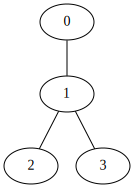

In [11]:
smallgraph = array([[0,1],[1,2],[1,3]]);
g = printgrafo(smallgraph)
g

It is clear that if node 1 is disconnected then remaining nodes will become isolated islands.
First Let's check that *smallgraph* is connected graph, that is, the number of connected components is 1

In [9]:
adjgraph = L2adj(smallgraph)
print(compo(adjgraph)[0])

1


If we remove node 1 from our code, the number of connected components shall be 3

In [13]:
print(findIslands(adjgraph ,smallgraph.max()+1))

[1]


That is it, the graph has now 3 isolated islands.

Now, we will use a more real world scenatio, the [IEEE 9 Bus power system](https://harryskon.wordpress.com/2016/02/28/wscc-9-bus-system/), which is a simple approximation of the Western System Coordinating Council (WSCC) to an equivalent system with nine buses.

![IEEE 9 Bus](ieee9.jpg)

The graph corresponding to this system is:

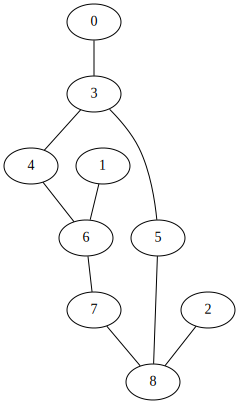

In [5]:
ieee9 = array([[0,3],[3,4],[3,5],[4,6],[6,1],[6,7],[5,8],[8,7],[8,2]]);
g9 = printgrafo(ieee9)
g9

Now, running *findislands* on the IEEE 9 graph we shall get 3 islands

In [14]:
graph9 = L2adj(ieee9)
print(findIslands(graph9 ,ieee9.max()+1))

[3, 6, 8]


That is it, nodes 3, 6 and 8 if removed will cause nodes 0, 1 and 2 to be isolated.

Insteading of coding connected components algorithm, it is also possible to *networkx* python Graph package.
The code below reproduces island detection for IEEE 9 bus.

In [15]:
import networkx as nx

G = nx.Graph()

G.add_edges_from([[0,3],[3,4],[3,5],[4,6],[6,1],[6,7],[5,8],[8,7],[8,2]])

print("Number components IEEE 9: ",nx.number_connected_components(G))

def findIslands(G):
    import copy
    isles=[]
    for n in G.nodes():
        Gt = copy.deepcopy(G)
        Gt.remove_node(n)
        nc=nx.number_connected_components(Gt)
        if nc>1:
            isles.append(n)
    return isles

print("List of isolated nodes",findIslands(G))

Number components IEEE 9:  1
List of isolated nodes [3, 6, 8]
